# Tutorial de Big Data
## Tutorial 6

**Objetivo:** Correr regresiones lineales. Estimar polinomios y encontrar el ECM.

Veremos:
- Introducción a Numpy y Scikit-learn
- Regresión lineal y polinómica
- Estadísticas (símil stata o R)
- Encontrar el ECM

### Repaso:

1. Cómo indicar el directorio a trabajar? 
2. [Merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) con id distintos
3. Merge con más de un id 
4. GroupBy() con mas de una columna
5. Alguna otra duda? 

#### 1. Cómo indicar el directorio a trabajar?

In [2]:
import os

# Con el método getcwd() podemos conocer en que directorio/carpeta estamos trabajando. 
# Inicialmente va a ser donde hayamos guardado el Jupyter Notebook
este_dir = os.getcwd()  
print(este_dir)

# Con el método path.dirname() podemos ir un nivel arriba del directorio que queramos. 
path_parent = os.path.dirname(os.getcwd())
print(path_parent)

# Con el método chdir() podemos definir en que directorio trabajar. Stata: cd
# Equivalente: os.chdir(path_parent+'/T06')
os.chdir(os.path.join(path_parent, 'T06'))

# Si volvemos a usar getcwd() veremos la nueva carpeta donde estamos trbajanado
print(os.getcwd())

/Users/federicolopez/Library/CloudStorage/OneDrive-Personal/Documents/UDESA/07/BIG-DATA/TUTORIALES/CLASES/T06
/Users/federicolopez/Library/CloudStorage/OneDrive-Personal/Documents/UDESA/07/BIG-DATA/TUTORIALES/CLASES
/Users/federicolopez/Library/CloudStorage/OneDrive-Personal/Documents/UDESA/07/BIG-DATA/TUTORIALES/CLASES/T06


#### 2. [Merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) con id distintos

In [3]:
import pandas as pd

df_a = pd.read_excel("tabla_ejemplo_3a.xlsx")
display(df_a)
df_b = pd.read_excel("tabla_ejemplo_3b.xlsx")
display(df_b)
df = df_a.append(df_b) 
df.reset_index(inplace=True, drop=True)
df


,grupo,inscriptos_ronda1,inscriptos_ronda2,edad_promedio
0,A,20,21,25.390012
1,B,20,35,39.969692
2,C,20,16,31.672932
3,D,18,9,42.095876
4,E,19,17,26.850697
5,F,20,37,33.802884
6,G,9,13,32.133074
7,H,18,1,44.164680
8,I,20,32,25.543545


,grupo,inscriptos_ronda1,inscriptos_ronda2,edad_promedio
0,J,17,9,38.693141
1,K,20,22,37.173910
2,L,12,10,33.753149
3,X,20,13,45.043822
4,Y,16,7,37.667676
5,Z,20,30,36.578090
6,X,20,13,45.043822
7,Y,16,7,37.667676
8,Z,20,30,36.578090


/var/folders/fm/4w6xdvfn5lx37kg5cbrn4jnc0000gn/T/ipykernel_2413/1633004154.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_a.append(df_b)


,grupo,inscriptos_ronda1,inscriptos_ronda2,edad_promedio
0,A,20,21,25.390012
1,B,20,35,39.969692
2,C,20,16,31.672932
3,D,18,9,42.095876
4,E,19,17,26.850697
5,F,20,37,33.802884
6,G,9,13,32.133074
7,H,18,1,44.164680
8,I,20,32,25.543545
9,J,17,9,38.693141


In [4]:
df_c = pd.read_excel("tabla_ejemplo_3c.xlsx") 
df_c.rename(columns={"grupo": "id_grupo"}, inplace=True)
df_c

,id_grupo,asignatura,area
0,A,Sociología,Cs. Sociales
1,B,Física,Cs. Naturales
2,C,Geografía,Cs. Sociales
3,D,Historia,Cs. Sociales
4,E,Física,Cs. Naturales
5,F,Sociología,Cs. Sociales
6,G,Historia,Cs. Sociales
7,H,Física,Cs. Naturales
8,I,Biología,Cs. Naturales
9,J,Biología,Cs. Naturales


In [5]:
# Para especificar dos id distintos usamos left_on and right_on. 
# Cuando el id es el mismo en ambas tablas podemos simplemente usar on='nombre_de_columna_id' 
df.merge(df_c, left_on='grupo', right_on='id_grupo', how='outer') 
# df es el dataframe "principal" o de la izquierda (o master en leguaje de Stata) y df_c es el dataframe "secundario" o de la derecha (using en Stata) 
# left_on es la columna de "df" (master) que usamos para el merge
# right_on es la columna de "df_c" (using) que usamos para el merge
# Vemos el merge pero no lo estamos guardando, para eso deberíamos crear un nuevo df o pisar el que tenemos

,grupo,inscriptos_ronda1,inscriptos_ronda2,edad_promedio,id_grupo,asignatura,area
0,A,20,21,25.390012,A,Sociología,Cs. Sociales
1,B,20,35,39.969692,B,Física,Cs. Naturales
2,C,20,16,31.672932,C,Geografía,Cs. Sociales
3,D,18,9,42.095876,D,Historia,Cs. Sociales
4,E,19,17,26.850697,E,Física,Cs. Naturales
5,F,20,37,33.802884,F,Sociología,Cs. Sociales
6,G,9,13,32.133074,G,Historia,Cs. Sociales
7,H,18,1,44.164680,H,Física,Cs. Naturales
8,I,20,32,25.543545,I,Biología,Cs. Naturales
9,J,17,9,38.693141,J,Biología,Cs. Naturales


#### 3. Merge con más de un id 

In [6]:
# Volvemos a renombrar la columna de grupo
df_c.rename(columns={"id_grupo": "grupo"}, inplace=True)
# Agregamos columnas de cohorte en ambos df
df['cohorte'] = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', 
                 '2020', '2021', '2021', '2021', '2021', '2021', '2021', '2022', 
                 '2022', '2022']
display(df)
df_c['cohorte'] = ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', 
                   '2020', '2021', '2021', '2021', '2021', '2021', '2022']
display(df_c)

,grupo,inscriptos_ronda1,inscriptos_ronda2,edad_promedio,cohorte
0,A,20,21,25.390012,2020
1,B,20,35,39.969692,2020
2,C,20,16,31.672932,2020
3,D,18,9,42.095876,2020
4,E,19,17,26.850697,2020
5,F,20,37,33.802884,2020
6,G,9,13,32.133074,2020
7,H,18,1,44.164680,2020
8,I,20,32,25.543545,2020
9,J,17,9,38.693141,2021


,grupo,asignatura,area,cohorte
0,A,Sociología,Cs. Sociales,2020
1,B,Física,Cs. Naturales,2020
2,C,Geografía,Cs. Sociales,2020
3,D,Historia,Cs. Sociales,2020
4,E,Física,Cs. Naturales,2020
5,F,Sociología,Cs. Sociales,2020
6,G,Historia,Cs. Sociales,2020
7,H,Física,Cs. Naturales,2020
8,I,Biología,Cs. Naturales,2020
9,J,Biología,Cs. Naturales,2021


In [7]:
# Para especificar qué columnas usar como id las ponemos en una lista: on=['',''] 
df_d = df.merge(df_c, on=['grupo','cohorte'], how='outer')
df_d
# (los valores nulos se llenaron)

,grupo,inscriptos_ronda1,inscriptos_ronda2,edad_promedio,cohorte,asignatura,area
0,A,20,21,25.390012,2020,Sociología,Cs. Sociales
1,B,20,35,39.969692,2020,Física,Cs. Naturales
2,C,20,16,31.672932,2020,Geografía,Cs. Sociales
3,D,18,9,42.095876,2020,Historia,Cs. Sociales
4,E,19,17,26.850697,2020,Física,Cs. Naturales
5,F,20,37,33.802884,2020,Sociología,Cs. Sociales
6,G,9,13,32.133074,2020,Historia,Cs. Sociales
7,H,18,1,44.164680,2020,Física,Cs. Naturales
8,I,20,32,25.543545,2020,Biología,Cs. Naturales
9,J,17,9,38.693141,2021,Biología,Cs. Naturales


#### 4. GroupBy() con la misma agregación para muchas columnas

In [8]:
# Opción A
df_d.groupby(by=["area","asignatura"]).agg({"inscriptos_ronda1":"sum", "inscriptos_ronda2":"sum"})

inscriptos_ronda1  inscriptos_ronda2
area          asignatura                                      
Cs. Naturales Biología                   37                 41
              Física                     69                 63
              Química                    16                  7
Cs. Sociales  Geografía                  60                 68
              Historia                   27                 22
              Sociología                 60                 71

In [9]:
# Opción B
df_d.groupby(["area", "asignatura"]).sum()[["inscriptos_ronda1", "inscriptos_ronda2"]]

/var/folders/fm/4w6xdvfn5lx37kg5cbrn4jnc0000gn/T/ipykernel_2413/3874845578.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_d.groupby(["area", "asignatura"]).sum()[["inscriptos_ronda1", "inscriptos_ronda2"]]


inscriptos_ronda1  inscriptos_ronda2
area          asignatura                                      
Cs. Naturales Biología                   37                 41
              Física                     69                 63
              Química                    16                  7
Cs. Sociales  Geografía                  60                 68
              Historia                   27                 22
              Sociología                 60                 71

##      NumPy y scikit-learn                   
**El paquete NumPy** es fundamental en Python. Está escrito en lenguajes de bajo nivel, lo que permite realizar operaciones matemáticas de manera muy eficiente. Para más información, ver la [guía oficial de uso de NumPy](https://docs.scipy.org/doc/numpy/user/index.html).

**El paquete scikit-learn** es una biblioteca de Python usada para machine learning, construida encima de NumPy y otros paquetes. Permite procesar datos, reducir la dimensionalidad de la base, implementar regresiones, clasificaciones, clustering y más. Pueden ver la [web de scikit-learn](https://scikit-learn.org/stable/)


In [10]:
# Importamos paquetes
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Numpy

A continuación crearemos dos vectores con los que trabajaremos en nuestra primera regresión lineal.

In [11]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

print(x)
print(y)
print(x.shape, y.shape)
# Ambos son vectores fila

[ 5 15 25 35 45 55]
[ 5 20 14 32 22 38]
(6,) (6,)


In [12]:
# Reshape para transformar x en un vector columna
x = x.reshape((-1, 1))   # El -1 indica el largo del array
# Es equivalente a: x = x.reshape((6, 1))

print(x)
print(x.shape)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
(6, 1)


### REGRESIÓN LINEAL CON SCIKIT-LEARN
Ahora utilizaremos la función [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) del paquete scikit-learn.
    
Se pueden proveer muchos parámetros opcionales para esta función:

- **fit_intercept**: Booleano que decide si calcular el intercepto (True) o considerarlo igual a cero (False). Por default es True.
- **normalize**: Booleano que decide si normalizar las variables input (True) o no (False). Es False por default.
- **copy_X**: Booleano que decide si copiar (True) o sobreescribir las variables input (False). Es True por default.

In [13]:
# Primero, estimar el modelo. Lo hacemos con fit():
model = LinearRegression().fit(x, y)

In [14]:
# Veamos ahora los resultados

# Calculamos el R2
r2 = model.score(x, y)
print('Coeficiente de determinación:', r2)

# El intercepto
intercepto = model.intercept_
print('\nIntercepto:', intercepto)

# La pendiente
pendiente = model.coef_
print('\nPendiente:', pendiente)


Coeficiente de determinación: 0.715875613747954

Intercepto: 5.633333333333333

Pendiente: [0.54]


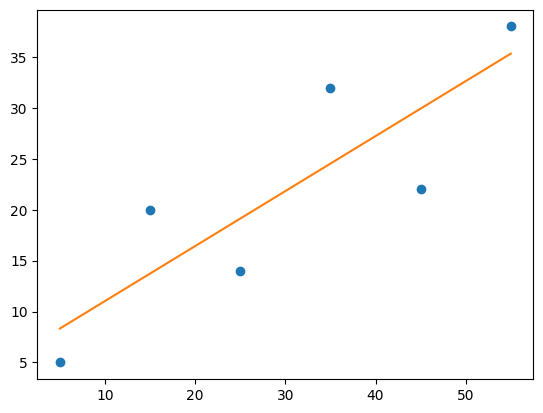

In [15]:
# Hacemos un scatter plot
plt.plot(x, y, 'o') 
plt.plot(x, pendiente*x + intercepto)


In [16]:
# Supongamos que ahora queremos predecir con este modelo. 
# Aplicamos .predict(), usamos los valores del regresor y el modelo estimado y 
# obtenemos la correspondiente respuesta predicha.

y_pred = model.predict(x)
print('Respuesta predicha:\n', y_pred)

# Recordemos cómo era nuestro vector y
print('\nEl vector original de y:', y)

# Con la y predicha podemos calcular el R^2 de esta otra forma
r2_new = r2_score(y, y_pred)
print("\nR2 (cálculo anterior):", r2, "\nR2 (nuevo cálculo):", r2_new)

Respuesta predicha:
 [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]

El vector original de y: [ 5 20 14 32 22 38]

R2 (cálculo anterior): 0.715875613747954 
R2 (nuevo cálculo): 0.715875613747954


In [17]:
# Si quiero probar valores nuevos de x (no los que usé para estimar el modelo):
x_new = np.arange(start=10, stop=20, step=2).reshape((-1, 1))   # Generamos valores entre [10, 20), con saltos de 2 en 2
print(x_new)

y_pred_new = model.predict(x_new)
print('\nNueva respuesta predicha:\n', y_pred_new)


[[10]
 [12]
 [14]
 [16]
 [18]]

Nueva respuesta predicha:
 [11.03333333 12.11333333 13.19333333 14.27333333 15.35333333]


In [18]:
# Para regresión lineal múltiple es lo mismo:
# Armamos un vector para la variable dependiente y una matriz de regresores:
x = np.array([[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]])

y =  np.array([4, 5, 20, 14, 32, 22, 38, 43])

print(x)
print(y)


[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [19]:
# Estimamos el modelo
model = LinearRegression().fit(x, y)
r2 = model.score(x, y)

# Miramos resultados
print('Coeficiente de determinación:', r2)
print('\nIntercepto:', model.intercept_)
print('\nCoeficientes:', model.coef_)

Coeficiente de determinación: 0.8615939258756776

Intercepto: 5.52257927519819

Coeficientes: [0.44706965 0.25502548]


In [20]:
# Vemos la respuesta predicha para los valores originales de los regresores
y_pred = model.predict(x)
print('Respuesta predicha:', y_pred, sep='\n')

Respuesta predicha:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [21]:
# Vemos la predicción para nuevos valores de X
x_new = np.arange(start=1, stop=31, step=3).reshape((-1, 2))   # Matriz con 2 columnas y tantas filas como tenga el array
print(x_new)
y_new = model.predict(x_new) 
print('Nueva respuesta predicha:', y_new, sep='\n')

[[ 1  4]
 [ 7 10]
 [13 16]
 [19 22]
 [25 28]]
Nueva respuesta predicha:
[ 6.98975085 11.20232163 15.41489241 19.62746319 23.84003398]


### REGRESIÓN POLINÓMICA
Si queremos correr una regresión de y contra x y x^2 necesitamos generar los datos de la nueva variable independiente.

[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) (de scikitlearn) genera una nueva matriz que consta de todas las combinaciones polinomiales de las x con un grado menor o igual al grado especificado. Por ejemplo, si una muestra de entrada es bidimensional y de la forma [a, b], las características polinomiales de grado 2 son [1, a, b, a^2, ab, b^2].

Se pueden cambiar varios parámetros de PolynomialFeatures:

- **degree** es un entero (2 por default) que representa el grado de la función de regresión polinómica.

- **include_bias** es un Booleano (True por default) que decide si incluir la columna de 1 que corresponde al intercepto (True) o no (False).

[Acá](https://data36.com/polynomial-regression-python-scikit-learn/) un ejemplo y una explicación más completa de cómo usarlo

In [22]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))   # ¿Por qué reshape?
y = np.array([15, 11, 2, 8, 25, 32])   # Vector fila
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


In [23]:
model_pol = PolynomialFeatures(include_bias=False)
model_pol.fit(x)  
# Aplicamos transformación a los datos. Genera una matriz de 6x2 (con x y x^2)
x_ = model_pol.transform(x)   
# equivalente a: x_ = model_pol.fit_transform(x)   
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [24]:
# Ahora usamos x_ para correr la regresión
model_pol = LinearRegression().fit(x_, y)

In [25]:
print('Coeficiente de determinación:', model_pol.score(x_, y))
print('\nIntercepto:', model_pol.intercept_)
print('\nCoeficientes:', model_pol.coef_)

Coeficiente de determinación: 0.8908516262498564

Intercepto: 21.37232142857143

Coeficientes: [-1.32357143  0.02839286]


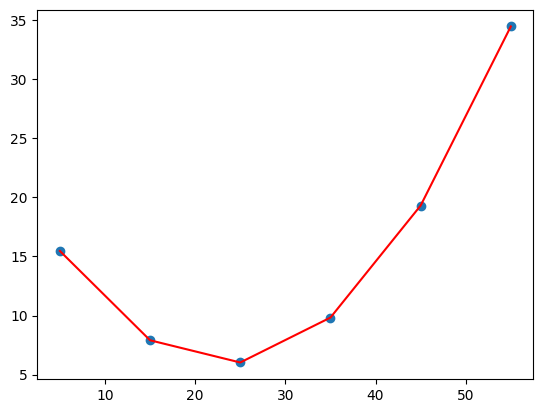

In [26]:
# Predicción
y_pred = model_pol.predict(x_)
# Graficamos
plt.scatter(x, y_pred)
plt.plot(x, y_pred, c='red') 
plt.show()

### Imitando a Stata con statsmodels

[statsmodels](https://www.statsmodels.org/stable/index.html) proporciona clases y funciones para la estimación de modelos estadísticos, para realizar pruebas estadísticas y para explorar datos estadísticos. 

In [27]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

#x = sm.add_constant(x)
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [28]:
# Especificamos el modelo
model = sm.OLS(y, x)
# Ajustamos el modelo
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              57.86
Date:                Sat, 22 Jun 2024   Prob (F-statistic):                    0.000120
Time:                        12:49:59   Log-Likelihood:                         -25.398
No. Observations:                   8   AIC:                                      54.80
Df Residuals:                       6   BIC:                                      54.96
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/federicolopez/Library/CloudStorage/OneDrive-Personal/Documents/UDESA/07/BIG-DATA/TUTORIALES/.venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [29]:
# Si solo queremos ver los coeficientes
print(results.params)

[ 0.69579339 -0.00477437]


In [30]:
# También lo podemos imprimir los resultados para latex
print(results.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared (uncentered):}      &     0.951   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared (uncentered):} &     0.934   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       }          &     57.86   \\
\textbf{Date:}             & Sat, 22 Jun 2024 & \textbf{  Prob (F-statistic):}          &  0.000120   \\
\textbf{Time:}             &     12:49:59     & \textbf{  Log-Likelihood:    }          &   -25.398   \\
\textbf{No. Observations:} &           8      & \textbf{  AIC:               }          &     54.80   \\
\textbf{Df Residuals:}     &           6      & \textbf{  BIC:               }          &     54.96   \\
\textbf{Df Model:}         &           2      & \textbf{                     }          &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     }          &             \\
\bottomru

/Users/federicolopez/Library/CloudStorage/OneDrive-Personal/Documents/UDESA/07/BIG-DATA/TUTORIALES/.venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [31]:
# Se puede obtener la respuesta predicha con los valores de x utilizados en el 
# entrenamiento del modelo usando .fittedvalues o .predict():

print('predicted response:\n', results.fittedvalues) #equivalente: results.predict(x)

predicted response:
 [-4.77436956e-03  3.47419260e+00  1.04273522e+01  1.73709630e+01
  2.43002507e+01  3.12390872e+01  3.81063081e+01  4.15805007e+01]


###     ERROR CUADRÁTICO MEDIO

Ahora veamos algunas métricas de evaluación usuales para los problemas de regresión en Machine Learning.

Vamos a observar los valores de las siguientes métricas:

**Error Cuadrático Medio / Mean Squared Error**

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{f}(x_i))^2$

**Raíz del Error Cuadrático Medio / Root Mean Squared Error**

$RMSE = \sqrt{MSE}$

**Error Absoluto Medio / Mean Absolute Error**

$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{f}(x_i)|$


In [33]:
# Generamos un dataset aleatorio
np.random.seed(0)
x = np.random.rand(100, 1)  # Array de la forma (100, 1) con nros aleatorios entre [0, 1) de una distribución uniforme
y = 2 + 3*x + np.random.rand(100, 1) 
print("x:\n", x)
print("y:\n", y) 

x:
 [[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]
 [0.4236548 ]
 [0.64589411]
 [0.43758721]
 [0.891773  ]
 [0.96366276]
 [0.38344152]
 [0.79172504]
 [0.52889492]
 [0.56804456]
 [0.92559664]
 [0.07103606]
 [0.0871293 ]
 [0.0202184 ]
 [0.83261985]
 [0.77815675]
 [0.87001215]
 [0.97861834]
 [0.79915856]
 [0.46147936]
 [0.78052918]
 [0.11827443]
 [0.63992102]
 [0.14335329]
 [0.94466892]
 [0.52184832]
 [0.41466194]
 [0.26455561]
 [0.77423369]
 [0.45615033]
 [0.56843395]
 [0.0187898 ]
 [0.6176355 ]
 [0.61209572]
 [0.616934  ]
 [0.94374808]
 [0.6818203 ]
 [0.3595079 ]
 [0.43703195]
 [0.6976312 ]
 [0.06022547]
 [0.66676672]
 [0.67063787]
 [0.21038256]
 [0.1289263 ]
 [0.31542835]
 [0.36371077]
 [0.57019677]
 [0.43860151]
 [0.98837384]
 [0.10204481]
 [0.20887676]
 [0.16130952]
 [0.65310833]
 [0.2532916 ]
 [0.46631077]
 [0.24442559]
 [0.15896958]
 [0.11037514]
 [0.65632959]
 [0.13818295]
 [0.19658236]
 [0.36872517]
 [0.82099323]
 [0.09710128]
 [0.83794491]
 [0.09609841]
 [0.97645947]
 [

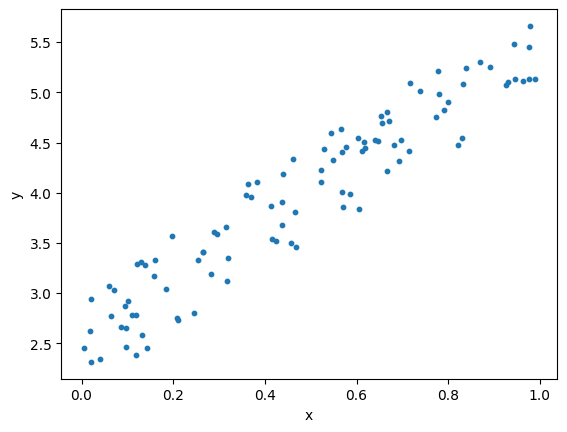

In [34]:
# Graficamos
plt.scatter(x, y, s=10)  # s indica el tamaño de los puntos del scatter.
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [35]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     921.4
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           1.22e-51
Time:                        12:51:17   Log-Likelihood:                -13.196
No. Observations:                 100   AIC:                             30.39
Df Residuals:                      98   BIC:                             35.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5581      0.054     47.751      0.0

In [36]:
# Predecimos las y 
y_pred = results.predict(x)
y_pred

array([4.1696989 , 4.65827012, 4.32812546, 4.15815731, 3.80216397,
       4.45478107, 3.84307721, 5.17681698, 5.38792493, 3.68407562,
       4.88302102, 4.11120696, 4.22617188, 5.27614181, 2.76668104,
       2.81393966, 2.61745238, 5.00311071, 4.84317706, 5.11291512,
       5.43184275, 4.90484995, 3.91323773, 4.8501438 , 2.90539891,
       4.43724078, 2.97904427, 5.33214853, 4.09051427, 3.77575598,
       3.33496109, 4.83165679, 3.89758877, 4.22731534, 2.61325723,
       4.3717982 , 4.35553037, 4.36973821, 5.32944444, 4.56028015,
       3.61379333, 3.84144667, 4.60670965, 2.7349352 , 4.51607453,
       4.52744237, 3.17587916, 2.93667868, 3.48435148, 3.62613527,
       4.23249195, 3.84605576, 5.46049027, 2.85773982, 3.17145728,
       3.03177366, 4.47596597, 3.30188375, 3.92742542, 3.27584826,
       3.02490232, 2.88220226, 4.48542538, 2.96386132, 3.13535417,
       3.64086031, 4.96896856, 2.84322288, 5.01874803, 2.84027791,
       5.4255031 , 3.93429821, 5.42638883, 4.33423978, 4.72896

In [37]:
# Vemos el MSE

# Usando MSE de scikit-learn
mse1 = mean_squared_error(y, y_pred) 
print(mse1)

# Usando Numpy
mse2 = np.square(np.subtract(y, y_pred)).mean() 
print(mse2)
# Cuidado! Nos dio distinto porque las funciones de Numpy no trabajan igual con arrays.
# Veamos cómo solucionar esto

0.07623324582875009
1.5097383028596258


In [38]:
y_flat = y.flatten()   # Modificamos la forma de y
print(y.shape, y_flat.shape, type(y), type(y_flat))
print("y flat:", y_flat)
print("y:",  y)

(100, 1) (100,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>
y flat: [4.32425705 4.41557607 4.54348415 4.59683809 3.51971754 4.51383967
 3.90480357 5.24757091 5.11406991 4.10307357 4.82230049 4.43309343
 4.40361296 5.07422687 3.02690599 2.65789364 2.94175839 5.07913241
 5.21620561 5.30256803 5.66110931 4.89880007 4.34052172 4.98557773
 2.77867833 4.52615628 2.44925306 5.13558157 4.2257185  3.53406343
 3.41168227 4.75146977 3.50392506 4.00358417 2.62633431 4.44377925
 4.41061242 4.50400281 5.48334751 4.47687933 3.9750703  3.67865773
 4.52875851 3.07259977 4.80649414 4.71580219 2.73137457 3.30626151
 3.66052635 4.08997932 3.86003862 4.1839306  5.12761445 2.921694
 2.75045025 3.33193678 4.76664394 3.32897555 3.80611562 2.80244377
 3.17433752 2.78466811 4.69104437 3.28093118 3.56526859 3.96197885
 4.47469377 2.65128189 5.24382528 2.4599249  5.450415   3.46029159
 5.13027979 3.83305835 5.01148844 2.34148806 3.19377257 3.28867098
 3.59283499 2.38802209 3.11864369 3.86426739 2.76967108 4.3

In [39]:
# Volvamos a probar
# Usando MSE de scikit-learn
mse1 = mean_squared_error(y_flat, y_pred) 
print(mse1)

# Usando Numpy
mse2 = np.square(np.subtract(y_flat, y_pred)).mean() 
print(mse2)
# Ahora sí obtenemos el mismo resultado

0.07623324582875009
0.07623324582875009


In [40]:
# También podemos ver el RMSE y el MAE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(rmse)
mae = mean_absolute_error(y, y_pred)
print(mae)

0.27610368673516494
0.23709498511190305


### Otro ejemplo

Vamos a trabajar con la librería [ISLP](https://islp.readthedocs.io/en/latest/). En particular, lo usaremos para descargar un dataset de ejemplo. Usaremos el dataset "Boston". Pueden ver más [acá](https://islp.readthedocs.io/en/latest/datasets/Boston.html)
Tiene valores de casas (median house value) para 506 barrios alrededor de Boston
- crim: per capita crime rate by town.
- zn: proportion of residential land zoned for lots over 25,000 sq.ft.
- indus: proportion of non-retail business acres per town.
- chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- nox: nitrogen oxides concentration (parts per 10 million).
- rm: average number of rooms per dwelling.
- age: proportion of owner-occupied units built prior to 1940.
- dis: weighted mean of distances to five Boston employment centres.
- rad: index of accessibility to radial highways.
- tax: full-value property-tax rate per USD 10,000.
- ptratio: pupil-teacher ratio by town.
- lstat: lower status of the population (percent).
- medv: median value of owner-occupied homes in 1000s USD.
   
Vamos a hacer una regresión para predecir medv


In [ ]:
#!pip install ISLP 
# Si tienen problemas instalándolo como está en la línea anterior:
# 1) abran una nueva ventana de anaconda prompt y escriban: pip install --user ISLP
# 2) cierren jupyter notebook y vuelvan a abrirlo
# Ahora ya deberían poder usar la librería ISLP

In [41]:
from ISLP import load_data

import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

boston = load_data("Boston")
print("Dimensión:", boston.shape,
      "\nColumnas:", boston.columns,
      "\nTipo de datos:", boston.dtypes)
boston.head()

Dimensión: (506, 13) 
Columnas: Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object') 
Tipo de datos: crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [42]:
# Empezamos con un modelo de regresión simple donde rm es el regresor
y = boston['medv']   # Median value of owner-occupied homes in 1000s USD.
x = boston['rm']    # Average number of rooms per dwelling.
x

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 506, dtype: float64

In [43]:
x = sm.add_constant(x)
x

,const,rm
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147
...,...,...
501,1.0,6.593
502,1.0,6.120
503,1.0,6.976
504,1.0,6.794


In [4]:
# Ajustamos el modelo
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())
print("\nConstante:", results.params[0], "\nPendiente:", results.params[1])

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           2.49e-74
Time:                        12:23:17   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [6]:
y_pred = results.predict(x)
print(y_pred)
mse1 = mean_squared_error(y, y_pred) 
mse1

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64


43.60055177116957

Ahora vamos con una regresión múltiple

In [44]:
y = boston['medv']
x2 = boston[boston.columns.drop('medv')]
x2 = sm.add_constant(x2)

model2 = sm.OLS(y, x2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          2.23e-133
Time:                        12:54:35   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

In [45]:
y_pred2 = results2.predict(x2)
mse2 = mean_squared_error(y, y_pred2) 
mse2

22.429681439489922

#### Hacemos una partición en la muestra y entrenamos el modelo en un conjunto de datos y lo evaluamos en otro

In [47]:
from sklearn.model_selection import train_test_split
# Realizamos el split de X e y en los sets de entrenamiento (train) y test
# Entrenaremos con el 70% de la base de datos y el resto se usarán para testear el modelo obtenido
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.3, random_state=100)
# si sacamos la columna de 1 (const)
#X_train, X_test, y_train, y_test = train_test_split(x2.loc[:, x2.columns != 'const'], y, test_size=0.3, random_state=100)


In [48]:
print(f"El dataset de entrenamiento cuenta con {len(X_train)} observaciones")
print(f"El dataset de evaluación cuenta con {len(X_test)} observaciones")

El dataset de entrenamiento cuenta con 354 observaciones
El dataset de evaluación cuenta con 152 observaciones


In [49]:
print(X_train.head(4))

     const      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
463    1.0   5.82115   0.0  18.10     0  0.713  6.513  89.9  2.8016   24  666   
75     1.0   0.09512   0.0  12.83     0  0.437  6.286  45.0  4.5026    5  398   
478    1.0  10.23300   0.0  18.10     0  0.614  6.185  96.7  2.1705   24  666   
199    1.0   0.03150  95.0   1.47     0  0.403  6.975  15.3  7.6534    3  402   

     ptratio  lstat  
463     20.2  10.29  
75      18.7   8.94  
478     20.2  18.03  
199     17.0   4.56  


In [ ]:
# Con scikit learn
model_t = LinearRegression(fit_intercept=False).fit(X_train, y_train)

In [ ]:
np.set_printoptions(suppress = True) #sacamos notación científica

print("\nCoeficientes:", model_t.coef_)
for n, coef in enumerate(model_t.coef_):
    print(X_train.columns[n], round(model_t.coef_[n],3))
#print("Intercepto:", model_t.intercept_)

In [ ]:
# Con statsmodels
results_t = sm.OLS(y_train, X_train).fit()
results_t.summary()

In [ ]:
#print("\nPvalores:\n", results_t.pvalues)
#print("\nCoeficiente de determinación:", results_t.rsquared)

In [ ]:
y_train_pred = results_t.predict(X_train)
y_test_pred = results_t.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Comparamos métrica en muestra de entrenamiento: {} y de test: {}".format(mse_train, mse_test))